In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 11.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1qJcDH8PGFPp4ve1k0o7CVJSkw2Jm0_60'})

In [ ]:
download.GetContentFile('MachineLearningCVE.zip')
!unzip MachineLearningCVE.zip

Archive:  MachineLearningCVE.zip
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
   creating: MachineLearningCVE/New folder/
  inflating: MachineLearningCVE/New folder/1.csv  
  inflating: MachineLearningCVE/New folder/11.csv  
  inflating: MachineLearningCVE/New folder/2.csv  
  inflating: MachineLearningCVE/New folder/3.csv  
  inflating: MachineLearningCVE/New folder/4.csv  
  inflating: MachineLearningCVE/New folder/5.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Wednesday-workingH

In [ ]:
import pandas as pd

df = pd.read_csv('MachineLearningCVE/New folder/1.csv')
df.head()

,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
0,2,0,12,0,6,6,6.0,0.0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0,0
1,1,1,6,6,6,6,6.0,0.0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0,0
2,1,1,6,6,6,6,6.0,0.0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0,0
3,1,1,6,6,6,6,6.0,0.0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0,0
4,2,0,12,0,6,6,6.0,0.0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0,0


In [ ]:
X = df.drop('ClassLabel', axis=1)
y = df['ClassLabel']

In [ ]:
from imblearn.over_sampling import ADASYN


In [ ]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)


In [ ]:
X_adasyn = pd.DataFrame(X_adasyn)
y_adasyn = pd.DataFrame(y_adasyn)

In [ ]:
y_adasyn.iloc[:,0].value_counts()

0    129131
4    128035
3    128031
1    128027
2    128026
5    128022
Name: ClassLabel, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=0)

NameError: ignored

In [ ]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

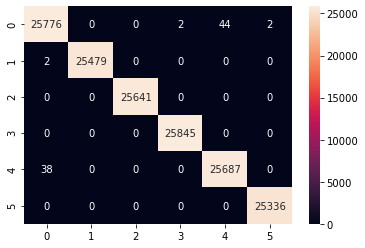

In [ ]:
y_pred = clf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt='.0f')

In [ ]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [ ]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.5453422769934743


In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6671


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([5, 3, 3, ..., 1, 3, 2], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6679


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6679
Test set score: 0.6671


[Text(1352.076923076923, 380.52, 'X[40] <= 5.901\ngini = 0.833\nsamples = 615404\nvalue = [103310, 102546, 102385, 102186, 102291, 102686]'),
 Text(721.1076923076923, 271.8, 'X[20] <= 3757.117\ngini = 0.8\nsamples = 511679\nvalue = [101771, 102546, 102385, 0, 102291, 102686]'),
 Text(360.55384615384617, 163.07999999999998, 'X[51] <= 23.5\ngini = 0.751\nsamples = 408888\nvalue = [100440, 102546, 102385, 0, 102291, 1226]'),
 Text(180.27692307692308, 54.360000000000014, 'gini = 0.488\nsamples = 177267\nvalue = [74713, 102546, 8, 0, 0, 0]'),
 Text(540.8307692307692, 54.360000000000014, 'gini = 0.597\nsamples = 231621\nvalue = [25727, 0, 102377, 0, 102291, 1226]'),
 Text(1081.6615384615384, 163.07999999999998, 'X[51] <= 31.5\ngini = 0.026\nsamples = 102791\nvalue = [1331, 0, 0, 0, 0, 101460]'),
 Text(901.3846153846155, 54.360000000000014, 'gini = 0.0\nsamples = 965\nvalue = [965, 0, 0, 0, 0, 0]'),
 Text(1261.9384615384615, 54.360000000000014, 'gini = 0.007\nsamples = 101826\nvalue = [366, 0

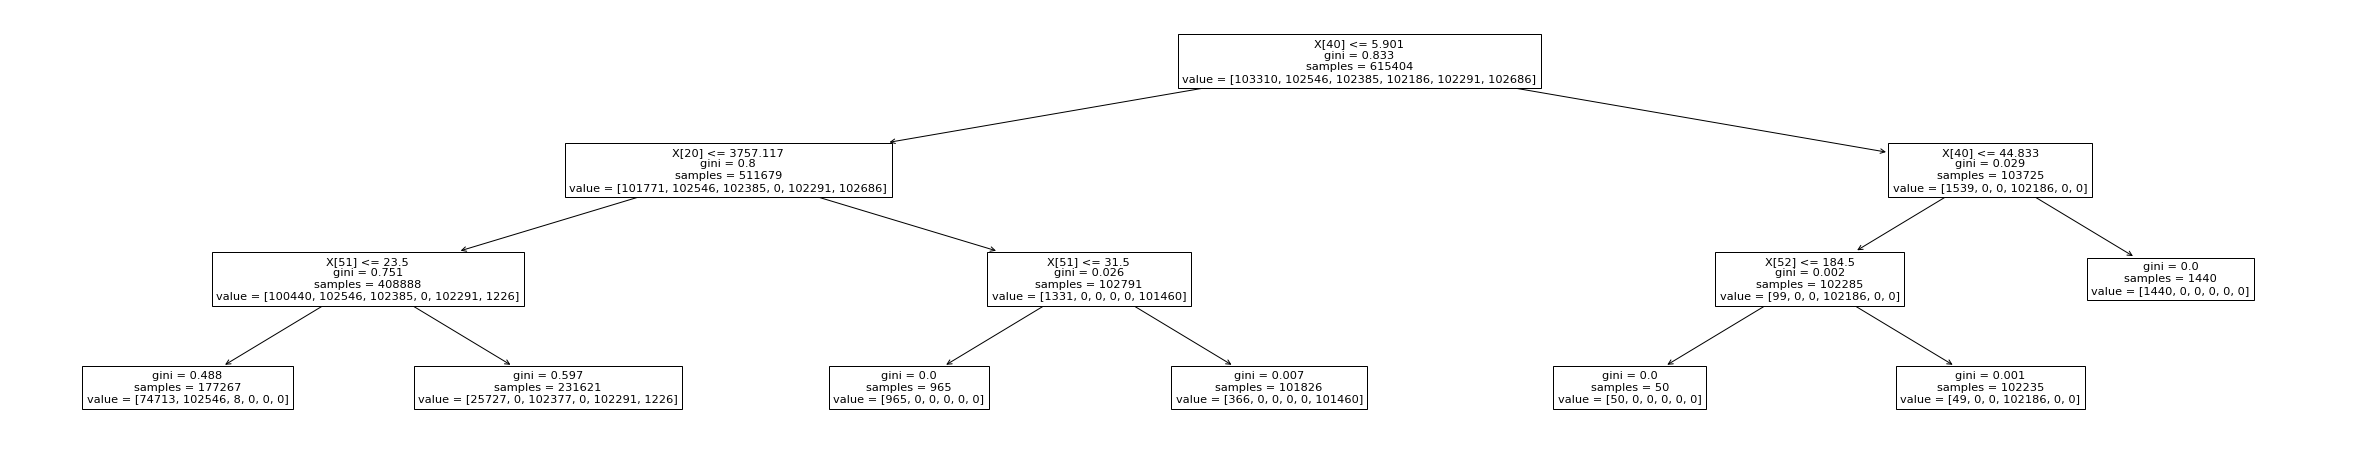

In [ ]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
plt.figure(figsize=(42,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9278


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([5, 3, 3, ..., 1, 3, 2], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9273


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9273
Test set score: 0.9278


[Text(1785.6, 380.52, 'X[16] <= 0.5\nentropy = 2.585\nsamples = 615404\nvalue = [103310, 102546, 102385, 102186, 102291, 102686]'),
 Text(892.8, 271.8, 'X[53] <= 236.572\nentropy = 1.194\nsamples = 212886\nvalue = [8014, 0, 0, 102186, 0, 102686]'),
 Text(446.4, 163.07999999999998, 'X[4] <= 28.5\nentropy = 0.326\nsamples = 109209\nvalue = [6523, 0, 0, 0, 0, 102686]'),
 Text(223.2, 54.360000000000014, 'entropy = 0.113\nsamples = 104199\nvalue = [1566, 0, 0, 0, 0, 102633]'),
 Text(669.5999999999999, 54.360000000000014, 'entropy = 0.085\nsamples = 5010\nvalue = [4957, 0, 0, 0, 0, 53]'),
 Text(1339.1999999999998, 163.07999999999998, 'X[55] <= 20.5\nentropy = 0.109\nsamples = 103677\nvalue = [1491, 0, 0, 102186, 0, 0]'),
 Text(1116.0, 54.360000000000014, 'entropy = 0.02\nsamples = 102379\nvalue = [193, 0, 0, 102186, 0, 0]'),
 Text(1562.3999999999999, 54.360000000000014, 'entropy = 0.0\nsamples = 1298\nvalue = [1298, 0, 0, 0, 0, 0]'),
 Text(2678.3999999999996, 271.8, 'X[51] <= 23.5\nentropy =

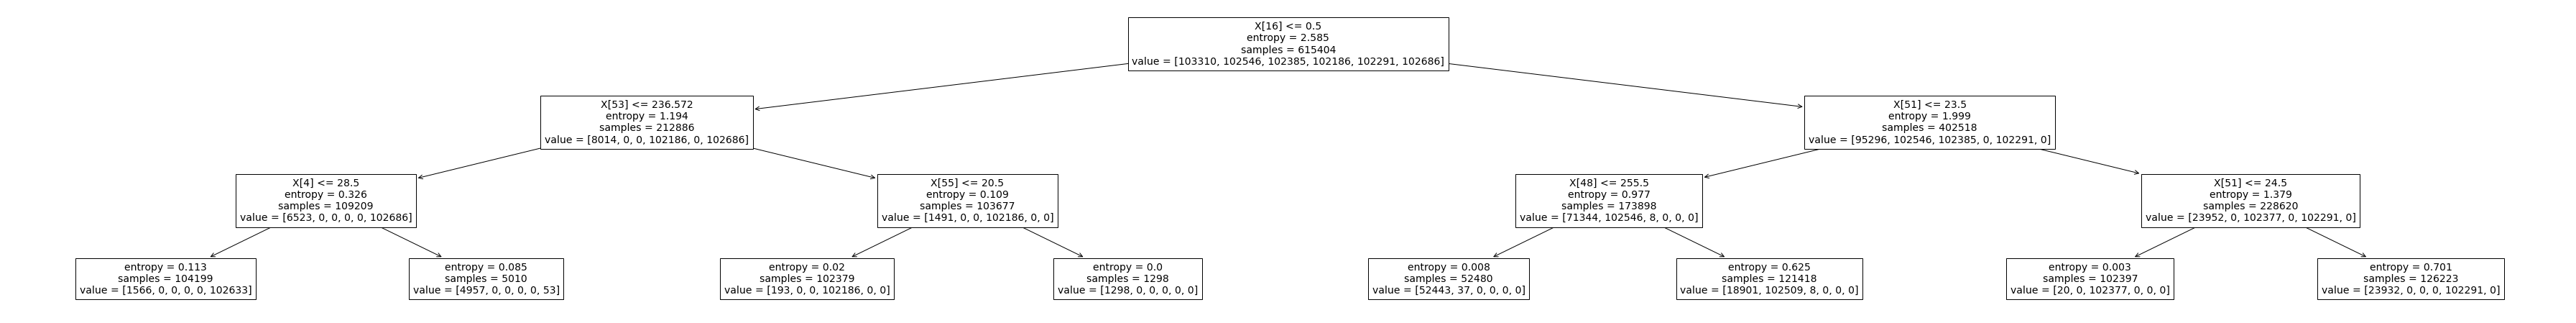

In [ ]:
plt.figure(figsize=(64,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14744  4758     2    51  5890   379]
 [   10 25471     0     0     0     0]
 [    0     2 25639     0     0     0]
 [    0     0     0 25845     0     0]
 [    0     0     0     0 25725     0]
 [   10     0     0     0     0 25326]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     25824
           1       0.84      1.00      0.91     25481
           2       1.00      1.00      1.00     25641
           3       1.00      1.00      1.00     25845
           4       0.81      1.00      0.90     25725
           5       0.99      1.00      0.99     25336

    accuracy                           0.93    153852
   macro avg       0.94      0.93      0.92    153852
weighted avg       0.94      0.93      0.92    153852



In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9996


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[25783     0     0     0    41     0]
 [    1 25480     0     0     0     0]
 [    0     0 25641     0     0     0]
 [    0     0     0 25845     0     0]
 [   27     0     0     0 25698     0]
 [    0     0     0     0     0 25336]]


<AxesSubplot:>

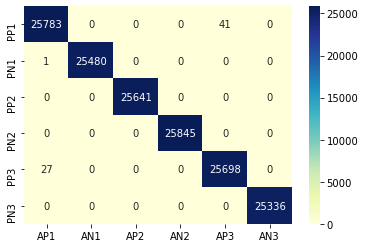

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['AP1', 'AN1','AP2','AN2','AP3','AN3'], 
                                 index=['PP1', 'PN1','PP2','PN2','PP3','PN3'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25824
           1       1.00      1.00      1.00     25481
           2       1.00      1.00      1.00     25641
           3       1.00      1.00      1.00     25845
           4       1.00      1.00      1.00     25725
           5       1.00      1.00      1.00     25336

    accuracy                           1.00    153852
   macro avg       1.00      1.00      1.00    153852
weighted avg       1.00      1.00      1.00    153852



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


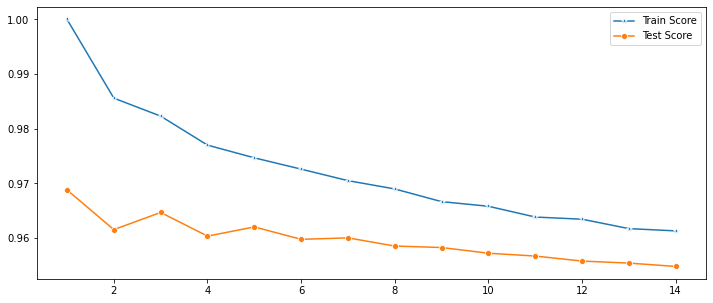

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9567090005521811

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,34941,2517,96,1,9,52,37616
1,771,41905,0,0,0,0,42676
2,43,0,664,0,0,0,707
3,7,0,0,13,0,0,20
4,18,1,1,0,11,0,31
5,12,0,0,0,0,433,445
All,35792,44423,761,14,20,485,81495


Text(0.5, 15.0, 'Predicted label')

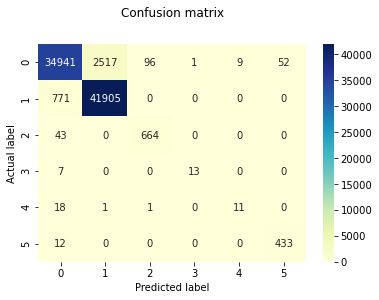

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     37616
           1       0.94      0.98      0.96     42676
           2       0.87      0.94      0.90       707
           3       0.93      0.65      0.76        20
           4       0.55      0.35      0.43        31
           5       0.89      0.97      0.93       445

    accuracy                           0.96     81495
   macro avg       0.86      0.80      0.82     81495
weighted avg       0.96      0.96      0.96     81495

